## Imports

In [1]:
!pip install -q arabic-reshaper python-bidi
!pip install -q wordcloud arabic_reshaper pyarabic
!pip install -q wordcloud arabic_reshaper python-bidi
!pip install -q wordcloud arabic-reshaper

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.9/292.9 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 kB 2.0 MB/s eta 0:00:00


In [2]:
import glob
import os
import json
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import matplotlib.ticker as ticker
import matplotlib.font_manager as fm
import arabic_reshaper
from bidi.algorithm import get_display
from wordcloud import WordCloud
from pyarabic.araby import strip_tashkeel
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import numpy as np
from scipy.stats import pearsonr
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [3]:
!unzip -q "/content/Raw Data.zip"
!unzip -q "/content/Annotations.zip"
!unzip -q "/content/Amiri.zip"

In [4]:
data = {
    "filenames" : [],
    "content" : [],
    "annotation" : []
}

In [5]:
def read_text_files(annotation_path, raw_data_path):
    for filename in sorted(os.listdir(annotation_path)):
        if filename.endswith(".json"):  # Process only .json files
            filename_without_suffix = filename.split("_annotation.json")[0]
            file_path = os.path.join(annotation_path, filename)
            with open(file_path, "r", encoding="utf-8") as file:
                json_data = json.load(file)
            data['filenames'].append(filename_without_suffix)
            data['annotation'].append(json_data)

            txt_path = os.path.join(raw_data_path, filename_without_suffix + ".txt")
            try:
                with open(txt_path, "r", encoding="utf-8") as file:
                    data['content'].append(file.read())
            except FileNotFoundError:
                print(f"File {txt_path} not found. Error!!!")
                break
    return data

In [6]:
len(os.listdir("/content/Raw Data"))

145

In [7]:
len(os.listdir("/content/Annotations"))

146

In [8]:
annotation_path = "/content/Annotations" #/content/Annotations
raw_data_path = "/content/Raw Data" #/content/Raw Data
data = read_text_files(annotation_path, raw_data_path)

File /content/Raw Data/أميتاب باتشان  الدحيح.txt not found. Error!!!


In [9]:
#Remove أميتاب باتشان  الدحيح_annotation.json file
os.remove("/content/Annotations/أميتاب باتشان  الدحيح_annotation.json")

In [10]:
len(os.listdir("/content/Annotations"))

145

In [11]:
data = {
    "filenames" : [],
    "content" : [],
    "annotation" : []
}

In [12]:
annotation_path = "/content/Annotations" #/content/Annotations
raw_data_path = "/content/Raw Data" #/content/Raw Data
data = read_text_files(annotation_path, raw_data_path)

In [13]:
print(data["filenames"][0])
print(data["content"][0])
print(data["annotation"][0])

Chat GPT  الدحيح
4.25: [موسيقى]
10.32: [موسيقى]
12.139: عمي بسيوني الايام يا راجل طيب دلوقتي
15.54: افتكرت عم بسيوني سامحني يا عم بسيوني
18.66: بعدين
19.88: بعد ما استبدلتوني بالذكاء الاصطناعي
23.4: وعشان ايه عشان ايه كل ده عشان اذكى تمام
28.519: وما بيشربش سجاير في المكتب
31.7: بس اديك محتاج ولايس وسط الناس
36.899: الخبره عمرها ما تيجي من المكنه او
41.64: كمبيوتر الخبره الحقيقيه
44.96: بتيجي من الانسان اللي صانع الكمبيوتر ما
51.0: فيش احسن من الذكاء الطبيعي
54.8: ولا الرضاع الطبيعي
58.199: ولا عسل جبل النحل الطبيعي الاصلي الجميل
63.42: ارجوك يا عم بسيوني يا راجل يا طيب شوف
66.24: لنا حل وشغل لنا المكنه بسم الله الرحمن
68.28: الرحيم
70.74: خد بالك الخبره حاضر خذ الخلاصه انجز خد
74.939: الزبده بتاعت الموضوع خذ الزيتونه ماشي
77.64: بكل الخضار اللي انت عايزه خطوه خطوه
79.68: الموضوع سهل وبسيط اول حاجه جربت تدوس على
82.2: زرار الباور دوس زرار الباور ما اشتغلش
87.259: ايه ثاني لا ما فيش تاني
94.799: لو السخان بتاعك بايظ مش انا هصلحه بس
99.0: اعرف حد بيصلح سخانات كويس قوي
104.84: [موسيقى]
11

## Clean Timestamps

In [14]:
def clean_timestamps(data):
    cleaned_text_videos = []

    for content in data["content"]:
        cleaned_lines = []

        for line in content.split("\n"):
            # Skip empty lines
            if not line.strip():
                continue
            # Check if there's a number pattern before a colon
            if ":" in line:
                parts = line.split(':', 1)
                # Check if part before colon contains only numbers and dots
                if all(c.isdigit() or c == '.' for c in parts[0].strip()):
                    cleaned_line = parts[1].strip()
                    cleaned_lines.append(cleaned_line)
                else:
                    cleaned_lines.append(line)
            else:
                cleaned_lines.append(line)

        # Append cleaned data to the new dictionary
        cleaned_text_videos.append('\n'.join(cleaned_lines))
    data['content'] = cleaned_text_videos
    return data

In [15]:
data = clean_timestamps(data)
print(data["content"][1][:500])  # Print first 500 characters of the first cleaned content

طبعًا يا "جون"،
انت مستغرب، احنا خاظفينك ليه!
لا، والله، كتر خيركم!
دا كان فيه واحد هيعجنّي ضرب،
لولا إن انتم، الحمد لله،
خطفتوني وأنقذتم حياتي!
حلو، انت تم اختيارك
لمشروع سرّي وضخم يا "جون"،
مشروع هينقذ العالم،
وليك مكافأة مالية كبيرة أوي.
دا أنا كلب فلوس، اؤمرني.
قبل ما أقولّك أي تفاصيل
عن المشروع يا "جون"،
لازم تعرف إن حياتك كما تعرفها، ستنتهي.
ما هي أصلًا منتهية،
هو اللي احنا عايشينها دي عيشة؟
بس، لا مؤاخذة يا باشا،
اشمعنى اختارتوني أنا بالذات؟
زي ما قلتلك، المشروع دا سرّي للغاية،
واللي يشتر


## Remove Special Music Token


In [16]:
def remove_special_music_token(data):
    cleaned_text_videos = []

    for content in data["content"]:
        # Split into lines and remove the [موسيقى] token
        lines = content.split("\n")
        cleaned_lines = [line.replace("[موسيقى]", "").strip() for line in lines]
        cleaned_lines = [line for line in cleaned_lines if line]  # Remove empty lines

        # Append cleaned content
        cleaned_text_videos.append('\n'.join(cleaned_lines))

    # Update the content in the original dictionary
    data["content"] = cleaned_text_videos
    return data

In [17]:
data = remove_special_music_token(data)
print(data["content"][2][:500])  # Print first 500 characters of the first cleaned content

انتم عارفين يا جماعة؟ احنا بقالنا
13 يوم مع بعض محبوسين في الغواصة!
وبصراحة، كانوا 13 يوم في منتهى...!
يا عم مش وقت "ديستويفسكي" دلوقتي!
دوس على الزرار!
ادّيني فرصة أفكر طيب!
بقولّك، مفيش وقت. "حسنينوف" بيضيع!
يا حبيبي يلّا، الراجل خرملي ودني!
- استنى!
- طب يلّا، يلّا، دوس على الزرار!
يعني انتم عايزينّي أدوس يعني؟
بقولّك دوس، ورحمة أبوك تدوس!
مش عارف! حاسس إن أنا محتاج أشقلب جنيه،
علشان نبقى سيبنا الموضوع للحظ!
جنيه إيه يا حمار، يا جاهل؟!
احنا عملتنا الروبل!
يا "أبو عوف"، اخلص!
"حسنينوف" عنده Br


## Normalize Arabic Text

In [18]:
def normalize_arabic_text(data):
    normalized_texts = []

    # Define character mappings
    char_mappings = {
        'أ': 'ا',
        'إ': 'ا',
        'آ': 'ا',
        'ى': 'ي',
        'ة': 'ه',
        'ؤ': 'و',
        'ئ': 'ي'
    }

    for content in data["content"]:
        # Apply all character replacements
        for original, replacement in char_mappings.items():
            content = content.replace(original, replacement)
        normalized_texts.append(content)  # Store normalized content

    # Update content in the original dictionary
    data["content"] = normalized_texts
    return data

In [19]:
data = normalize_arabic_text(data)
print(data["content"][1][:500])  # Print first 500 characters of the first cleaned content

طبعًا يا "جون"،
انت مستغرب، احنا خاظفينك ليه!
لا، والله، كتر خيركم!
دا كان فيه واحد هيعجنّي ضرب،
لولا ان انتم، الحمد لله،
خطفتوني وانقذتم حياتي!
حلو، انت تم اختيارك
لمشروع سرّي وضخم يا "جون"،
مشروع هينقذ العالم،
وليك مكافاه ماليه كبيره اوي.
دا انا كلب فلوس، اومرني.
قبل ما اقولّك اي تفاصيل
عن المشروع يا "جون"،
لازم تعرف ان حياتك كما تعرفها، ستنتهي.
ما هي اصلًا منتهيه،
هو اللي احنا عايشينها دي عيشه؟
بس، لا مواخذه يا باشا،
اشمعني اختارتوني انا بالذات؟
زي ما قلتلك، المشروع دا سرّي للغايه،
واللي يشتر


## Remove Tashkeel

In [20]:
def remove_tashkeel(data):
    cleaned_texts = []

    # Regex pattern to remove Tashkeel (diacritics)
    p_tashkeel = re.compile(
        r"[\u0616-\u061A\u064B-\u0652\u06D6-\u06ED\u08F0-\u08F3\uFC5E-\uFC63\u0670]"
    )

    for content in data["content"]:
        normalized_content = re.sub(p_tashkeel, "", content)
        cleaned_texts.append(normalized_content)  # Store cleaned content

    # Update content in the original dictionary
    data["content"] = cleaned_texts
    return data

In [21]:
data = remove_tashkeel(data)
print(data["content"][1][:500])  # Print first 500 characters of the first cleaned content

طبعا يا "جون"،
انت مستغرب، احنا خاظفينك ليه!
لا، والله، كتر خيركم!
دا كان فيه واحد هيعجني ضرب،
لولا ان انتم، الحمد لله،
خطفتوني وانقذتم حياتي!
حلو، انت تم اختيارك
لمشروع سري وضخم يا "جون"،
مشروع هينقذ العالم،
وليك مكافاه ماليه كبيره اوي.
دا انا كلب فلوس، اومرني.
قبل ما اقولك اي تفاصيل
عن المشروع يا "جون"،
لازم تعرف ان حياتك كما تعرفها، ستنتهي.
ما هي اصلا منتهيه،
هو اللي احنا عايشينها دي عيشه؟
بس، لا مواخذه يا باشا،
اشمعني اختارتوني انا بالذات؟
زي ما قلتلك، المشروع دا سري للغايه،
واللي يشترك فيه،


## Remove Punctuation

In [22]:
def remove_punctuation(data):
    cleaned_texts = []

    # Define punctuation characters to remove
    punctuations = "()[]}{'?؟-،:!.,;\""

    for content in data["content"]:
        for punctuation in punctuations:
            content = content.replace(punctuation, "")
        cleaned_texts.append(content)  # Store cleaned content

    # Update content in the original dictionary
    data["content"] = cleaned_texts
    return data

In [23]:
data = remove_punctuation(data)
print(data["content"][0][:500])  # Print first 500 characters of the first cleaned content

عمي بسيوني الايام يا راجل طيب دلوقتي
افتكرت عم بسيوني سامحني يا عم بسيوني
بعدين
بعد ما استبدلتوني بالذكاء الاصطناعي
وعشان ايه عشان ايه كل ده عشان اذكي تمام
وما بيشربش سجاير في المكتب
بس اديك محتاج ولايس وسط الناس
الخبره عمرها ما تيجي من المكنه او
كمبيوتر الخبره الحقيقيه
بتيجي من الانسان اللي صانع الكمبيوتر ما
فيش احسن من الذكاء الطبيعي
ولا الرضاع الطبيعي
ولا عسل جبل النحل الطبيعي الاصلي الجميل
ارجوك يا عم بسيوني يا راجل يا طيب شوف
لنا حل وشغل لنا المكنه بسم الله الرحمن
الرحيم
خد بالك الخبره حاضر


## Remove Empty Lines

In [24]:
def strip_lines(data):
    cleaned_texts = []

    for content in data["content"]:
        # Split into lines, strip each line, and filter out empty lines
        lines = content.split('\n')
        cleaned_lines = [line.strip() for line in lines if line.strip()]
        # Join non-empty lines back together
        cleaned_texts.append('\n'.join(cleaned_lines))

    # Update content in the original dictionary
    data["content"] = cleaned_texts
    return data

In [25]:
data = strip_lines(data)
print(data["content"][0][:500])  # Print first 500 characters of the first cleaned content

عمي بسيوني الايام يا راجل طيب دلوقتي
افتكرت عم بسيوني سامحني يا عم بسيوني
بعدين
بعد ما استبدلتوني بالذكاء الاصطناعي
وعشان ايه عشان ايه كل ده عشان اذكي تمام
وما بيشربش سجاير في المكتب
بس اديك محتاج ولايس وسط الناس
الخبره عمرها ما تيجي من المكنه او
كمبيوتر الخبره الحقيقيه
بتيجي من الانسان اللي صانع الكمبيوتر ما
فيش احسن من الذكاء الطبيعي
ولا الرضاع الطبيعي
ولا عسل جبل النحل الطبيعي الاصلي الجميل
ارجوك يا عم بسيوني يا راجل يا طيب شوف
لنا حل وشغل لنا المكنه بسم الله الرحمن
الرحيم
خد بالك الخبره حاضر


## Remove stop words

In [26]:
def remove_stopwords(data):
    arabic_stopwords = [
      'في', 'من', 'على', 'الى', 'عن', 'و', 'ان', 'او', 'هذا', 'هذه', 'ما', 'هو', 'هي',
      'كان', 'كانت', 'يكون', 'تكون', 'لا', 'لم', 'له', 'لها', 'بالتالي', 'حتى', 'عند', 'بعد',
       'مش','يعني','انت','ولكن','بقي','بس','زي','دي','عشان','علي','يا','ولا','فيه','كدا','قبل', 'مع', 'الذي', 'دا', 'الذين',
      'تاني','لما','وبالتالي','مثلا','بتاع','شويه','كمان','عليه','دي','بين','انه','ممكن','يعني','ده','دي','انا','ايه','اللي', 'هؤلاء',
      'اكتر','دلوقتي','هنا','اكتر','يمكن','فيها','احنا','أولئك', 'كل', 'بعض', 'كده']
    cleaned_all_content = []

    for text in data["content"]:
        cleaned_single_content = []
        lines = text.split('\n')  # Split text into lines
        for line in lines:
            words = line.split(" ")
            filtered_words = [word for word in words if word not in arabic_stopwords]  # Remove stopwords
            cleaned_single_content.append(" ".join(filtered_words))  # Join words back into a string
        cleaned_single_content_joined = "\n".join(cleaned_single_content)  # Join lines back into a string
        cleaned_all_content.append(cleaned_single_content_joined)

    # Update the content field in the dictionary
    data["content"] = cleaned_all_content

    return data

In [27]:
data = remove_stopwords(data)
print(data["content"][1])

طبعا جون
مستغرب خاظفينك ليه
والله كتر خيركم
واحد هيعجني ضرب
لولا انتم الحمد لله
خطفتوني وانقذتم حياتي
حلو تم اختيارك
لمشروع سري وضخم جون
مشروع هينقذ العالم
وليك مكافاه ماليه كبيره اوي
كلب فلوس اومرني
اقولك اي تفاصيل
المشروع جون
لازم تعرف حياتك كما تعرفها ستنتهي
اصلا منتهيه
عايشينها عيشه
مواخذه باشا
اشمعني اختارتوني بالذات
قلتلك المشروع سري للغايه
واللي يشترك لازم يبقي شخص بايس
تمام
لهوش صحاب
صح
وبينام معيط ليله
وهو بيشكي وحدته وبوسه
خلاص باشا عرفت اني شخصيه مثيره للشفقه
قل لي الخطوه الجايه
الموضوع بسيط خالص
عايزك تنسي ابوك وامك ومراتك وعيالك
هتنقلوني بعيد عنهم

قتلناهم كلهم خلاص
قتلتوا عيلتي كلها
ينفعش نسيب اي فرصه
انك تحكي اي حاجه
لاي حد المشروع ايا
منطقي برضه المشروع
سر لازم توافق الاشتراك الاول
وافقت انتم خليتولي اوبشنز تانيه
مشروع
مشروع كبير مشروع كبير اوي اوي اوي
بقول لك ضخم اخي
والله شكلك عارف
عارف فكره
وانا بقول لك والله تعرف
عارف طبعا كاتبها النوته السريه
طلع اخويا النوته السريه
اهي
المشروع سيدي
طلع
كومباوند سكني صحراء اريزونا
المشروع السري
قتلتم عيلتي كلها عشانه
اسفين والله ات

## Join Text

In [28]:
def join_lines(data):
    joined_texts = []

    for content in data["content"]:
        # Split into lines, strip whitespace, and remove empty lines
        lines = [line.strip() for line in content.split('\n') if line.strip()]
        # Join all lines with a single space
        joined_content = ' '.join(lines)
        joined_texts.append(joined_content)

    # Update the original data dictionary
    data["content"] = joined_texts
    return data

In [29]:
data = join_lines(data)
print(data["content"][0][:500])

عمي بسيوني الايام راجل طيب افتكرت عم بسيوني سامحني عم بسيوني بعدين استبدلتوني بالذكاء الاصطناعي وعشان اذكي تمام وما بيشربش سجاير المكتب اديك محتاج ولايس وسط الناس الخبره عمرها تيجي المكنه كمبيوتر الخبره الحقيقيه بتيجي الانسان صانع الكمبيوتر فيش احسن الذكاء الطبيعي الرضاع الطبيعي عسل جبل النحل الطبيعي الاصلي الجميل ارجوك عم بسيوني راجل طيب شوف لنا حل وشغل لنا المكنه بسم الله الرحمن الرحيم خد بالك الخبره حاضر خذ الخلاصه انجز خد الزبده بتاعت الموضوع خذ الزيتونه ماشي بكل الخضار عايزه خطوه خطوه الموض


## Remove Spaces in filenames

In [30]:
data["filenames"] = [name.strip() for name in data["filenames"]]
data["content"] = [content.strip() for content in data["content"]]
data["annotation"] = [ann.strip() if isinstance(ann, str) else ann for ann in data["annotation"]]

In [31]:
print(repr(data["filenames"][:8]))

['Chat GPT  الدحيح', 'Oppenheimer  الدحيح', 'آخر يوم في العالم  الدحيح', 'أحلى برجر في العالم  الدحيح', 'أحمد عدوية  الدحيح', 'أخطر رجل مافيا  الدحيح', 'أخطر من النووي  الدحيح', 'أشهر ملاهي في كوكب الارض  الدحيح']


## Remove "الدحيح" at the end of each filename


In [32]:
# Remove "الدحيح" if it appears at the end of filenames
data["filenames"] = [name.strip().replace(" الدحيح", "").strip() for name in data["filenames"]]

In [33]:
print(repr(data["filenames"][:8]))

['Chat GPT', 'Oppenheimer', 'آخر يوم في العالم', 'أحلى برجر في العالم', 'أحمد عدوية', 'أخطر رجل مافيا', 'أخطر من النووي', 'أشهر ملاهي في كوكب الارض']


## Exploratory Data Analysis

In [34]:
def create_dataframe(data):
    # creating a dataframe
    df = pd.DataFrame({
        "filename": data["filenames"],
        "content": data["content"],
        "likes": [ann["Number_of_Likes"] for ann in data["annotation"]],
        "dislikes": [ann["Number_of_Dislikes"] for ann in data["annotation"]],
        "views": [ann["Number_of_Views"] for ann in data["annotation"]],
        "comments": [ann["Number_of_Comments"] for ann in data["annotation"]],
        "categories": [ann["Categories"] for ann in data["annotation"]]
    })

    return df

In [35]:
df = create_dataframe(data)
df.head()

,filename,content,likes,dislikes,views,comments,categories
0,Chat GPT,عمي بسيوني الايام راجل طيب افتكرت عم بسيوني سا...,158194,0,4196934,3417,"[chat gpt, how to use chat gpt, chat gpt expla..."
1,Oppenheimer,طبعا جون مستغرب خاظفينك ليه والله كتر خيركم وا...,206192,0,6313109,3213,"[مشروع مانهاتن, مشروع مانهاتن النووي, manhatta..."
2,آخر يوم في العالم,انتم عارفين جماعه بقالنا 13 يوم محبوسين الغواص...,156239,0,6396147,3185,"[الدحيح, برنامج الدحيح الجديد, eldahih, elda7e..."
3,أحلى برجر في العالم,ايوه ماما واحشاني ست الكل والله الغربه صعبه جد...,98494,0,2322834,2258,"[الدحيح, برنامج الدحيح الجديد, #daheeh #الدحيح..."
4,أحمد عدوية,راح فين فندم شايفني بدور لقينا مارادونا فندم ا...,54754,0,1696731,1961,"[الدحيح, برنامج الدحيح الجديد, حلقة الدحيح, بر..."


## Method to structure arabic text correctly

In [36]:
# Reshape and reorder Arabic text method
def process_arabic_text(text):
    # Reshape the Arabic text
    reshaped_text = arabic_reshaper.reshape(text)
    # Apply bidirectional algorithm to correct text direction
    return get_display(reshaped_text)

## Checking the most liked episode

<ipython-input-37-376b5a34d49b>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='likes', y='processed_filename', data=top_30_liked, palette="magma")


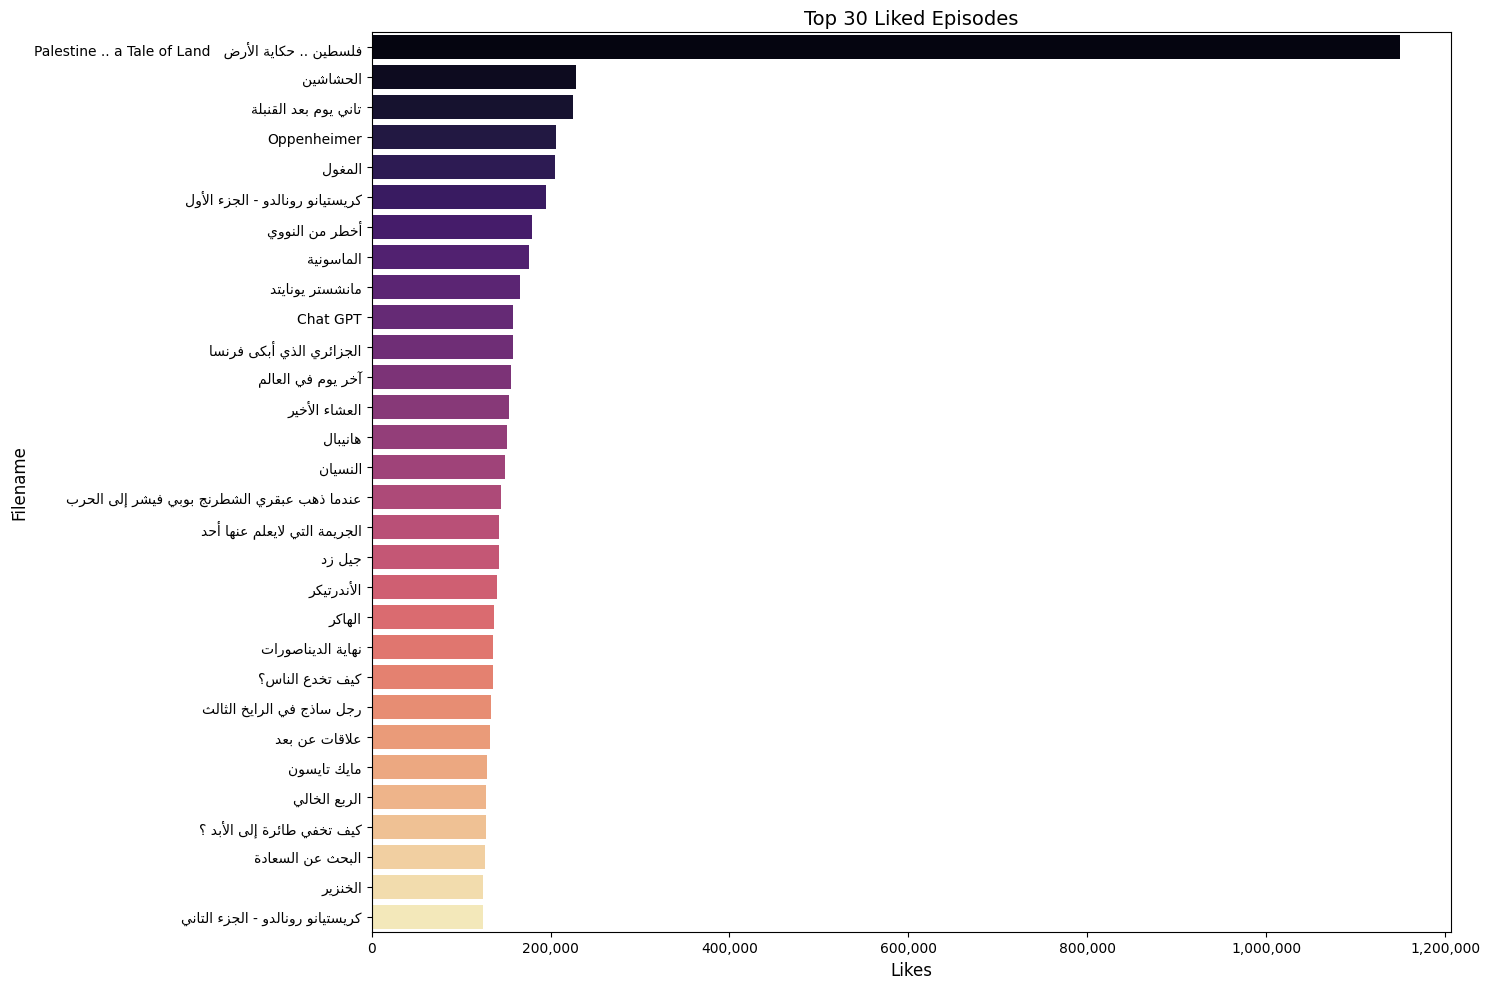

In [37]:
# Sort and select top 30 episodes
top_30_liked = df.sort_values('likes', ascending=False).head(30)

# Process Arabic text in the filename column
top_30_liked['processed_filename'] = top_30_liked['filename'].apply(process_arabic_text)

# Create the plot
plt.figure(figsize=(15, 10))

# Create horizontal bar plot of top 30
ax = sns.barplot(x='likes', y='processed_filename', data=top_30_liked, palette="magma")

# Format x-axis to show whole numbers
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{int(x):,}'))

# Customize ticks and labels
plt.xlabel("Likes", fontsize=12)
plt.ylabel("Filename", fontsize=12)
plt.title("Top 30 Liked Episodes", fontsize=14)

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()

## Checking the episode with highest comments

<ipython-input-38-1a1a43009a52>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='comments', y='processed_filename', data=top_30_commented, palette="magma")


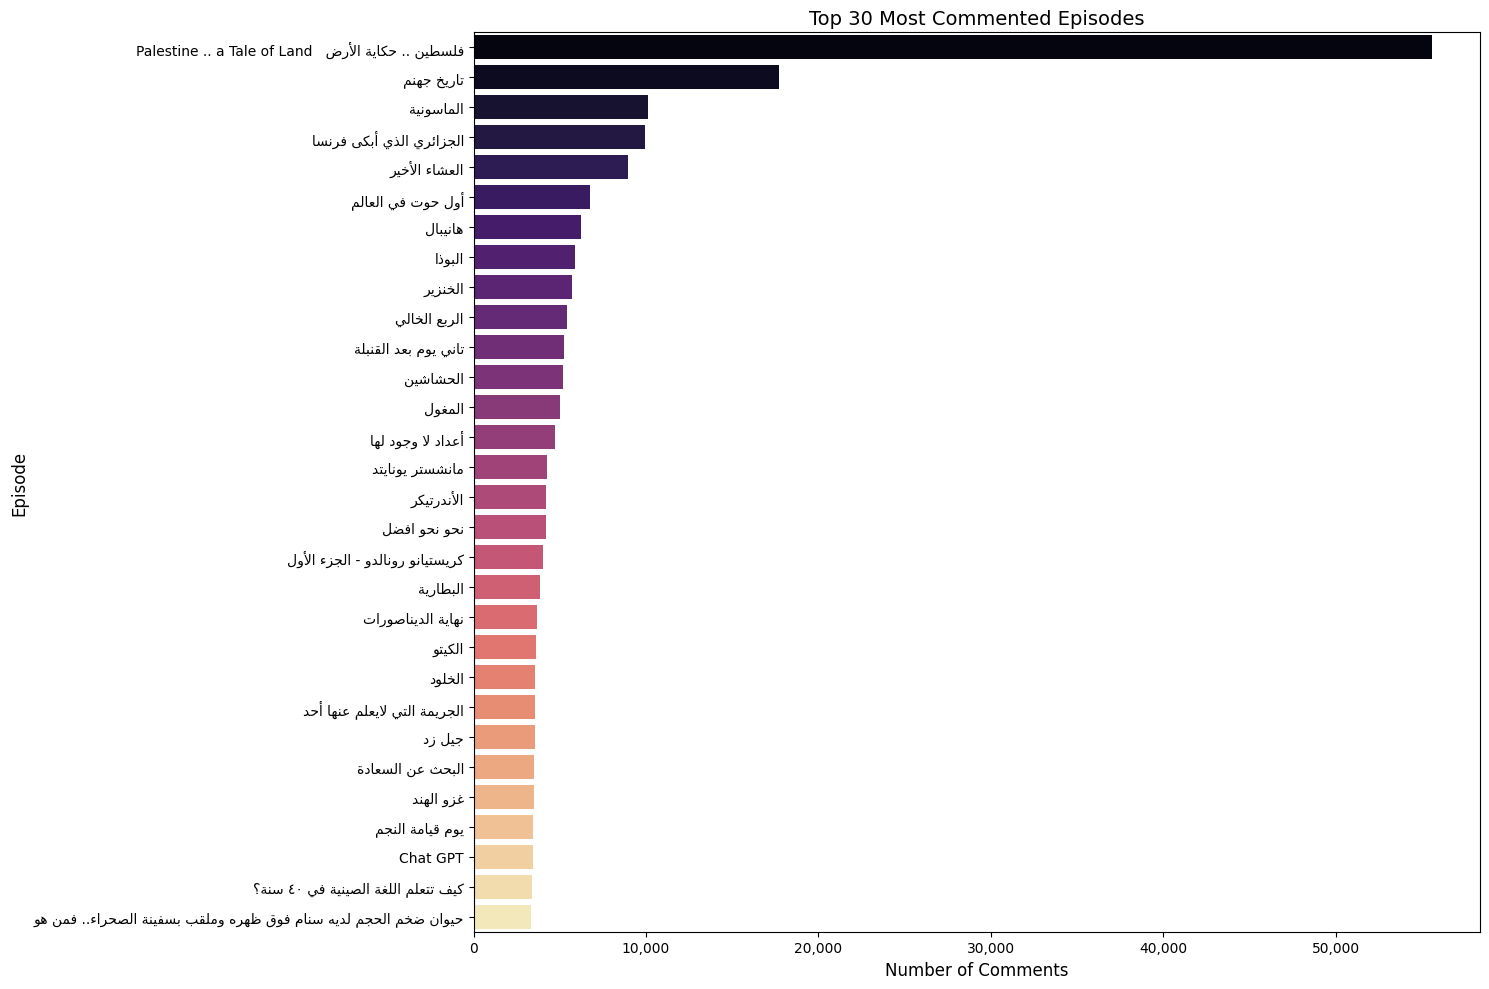

In [38]:
# Sort and select top 30 episodes based on comments
top_30_commented = df.sort_values('comments', ascending=False).head(30)

# Process Arabic text in the filename column
top_30_commented['processed_filename'] = top_30_commented['filename'].apply(process_arabic_text)

# Create the plot
plt.figure(figsize=(15, 10))

# Create horizontal bar plot of top 30 based on comments
ax = sns.barplot(x='comments', y='processed_filename', data=top_30_commented, palette="magma")

# Format x-axis to show whole numbers
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: f'{int(x):,}'))

# Customize ticks and labels
plt.xlabel("Number of Comments", fontsize=12)
plt.ylabel("Episode", fontsize=12)
plt.title("Top 30 Most Commented Episodes", fontsize=14)

# Adjust layout to prevent cutting off labels
plt.tight_layout()

# Show the plot
plt.show()

## Checking the most occurring words

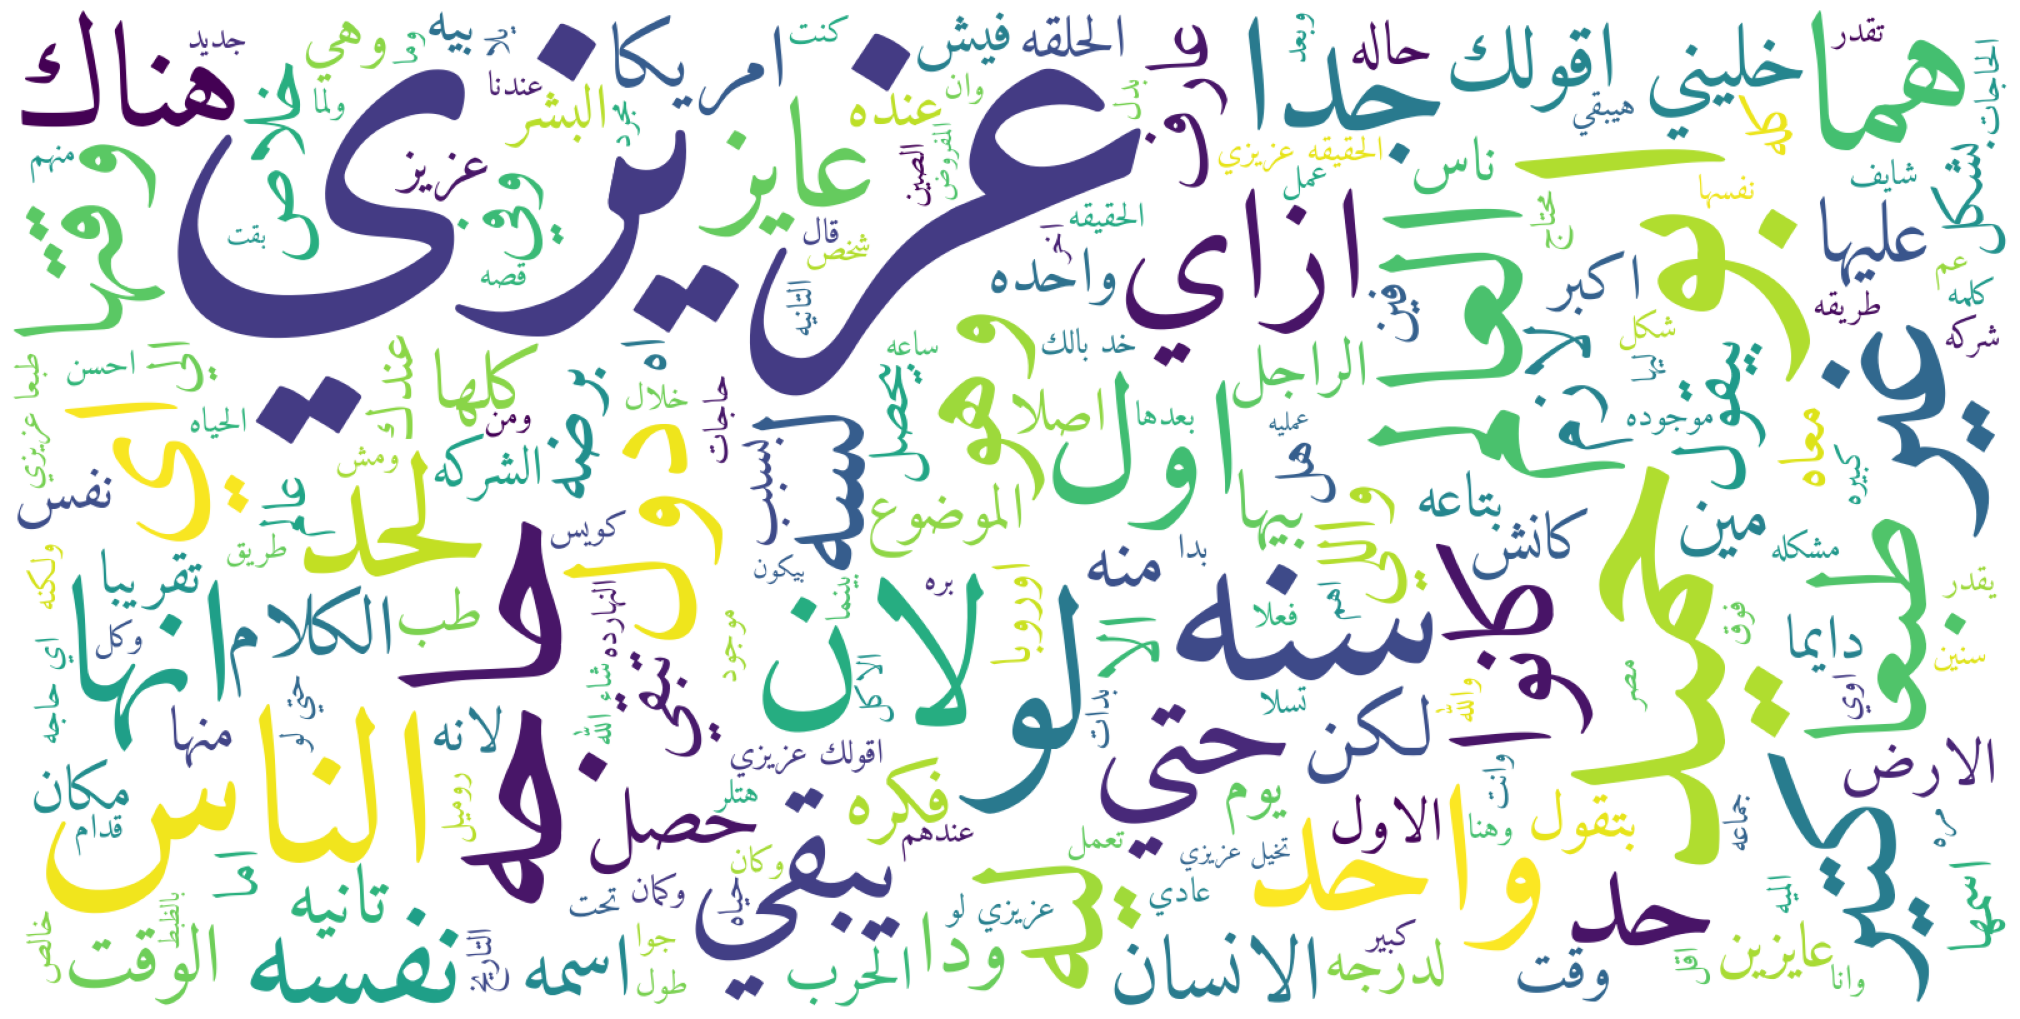

In [39]:
# Combine all text from the content column
all_text = ' '.join(df['content'])

# Create WordCloud with Arabic font support
wordcloud = WordCloud(
    width=1600,
    height=800,
    background_color='white',
    font_path='/content/Amiri-Regular.ttf',  # Path to Amiri font
    max_words=200,
    font_step=2,
    prefer_horizontal=0.6,
    min_font_size=10
).generate(all_text)

# Display the word cloud
plt.figure(figsize=(20,10), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## Checking the most occuring categories

Based on the chart, the categories annotation is not imporant, it doesn't represent real categories. even if we dropped "el dahih" category, they're still very random and unuseful

In [40]:
def plot_top_categories(df, column, top_n=40):
    if column not in df.columns:
        print(f"Error: Column '{column}' not found in DataFrame.")
        return

    # Ensure all values are lists before exploding
    df[column] = df[column].apply(lambda x: x if isinstance(x, list) else [x])

    # Flatten lists into individual rows
    top_categories = df[column].explode().value_counts().head(top_n)

    processed_labels = [process_arabic_text(cat) for cat in top_categories.index]


    # Plot the bar chart
    plt.figure(figsize=(12, 6))
    sns.barplot(x=top_categories.values, y=processed_labels, palette="viridis")
    plt.xlabel("Count")
    plt.ylabel("Category")
    plt.title(f"Top {top_n} Most Occurring Categories")
    plt.show()

<ipython-input-40-7ba7e7ce9f31>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=processed_labels, palette="viridis")


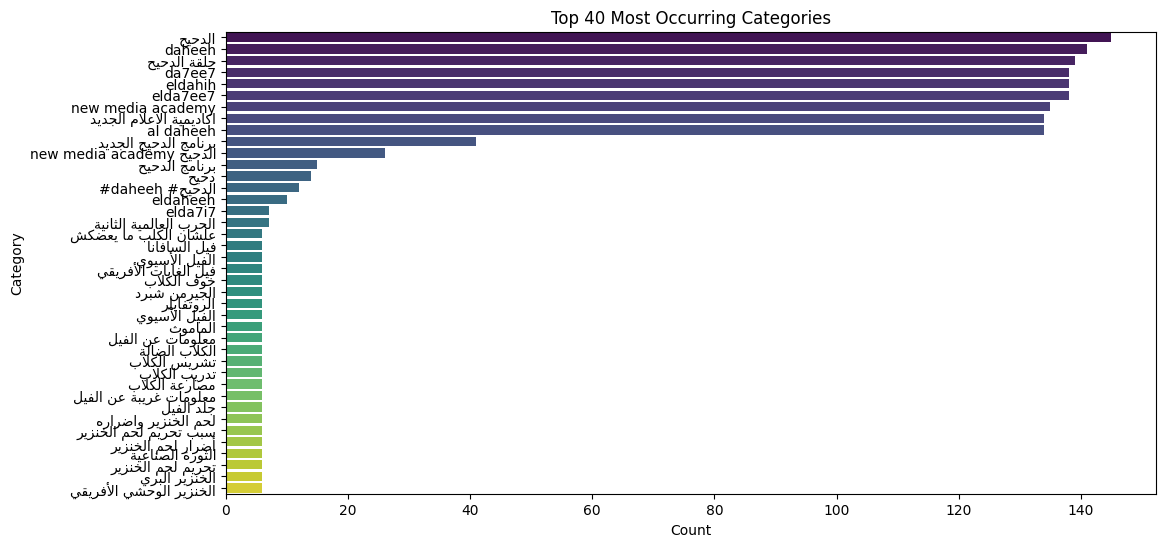

In [41]:
plot_top_categories(df, "categories", top_n=40)

## TF-IDF vs. Word count


It is observed that words with a high count in a document tend to have a low weight in that same document.

In [42]:
def compute_tfidf(df, text_column, max_features=1000):
    # Convert the text column to a list of documents
    documents = df[text_column].astype(str).tolist()

    # Initialize TF-IDF Vectorizer
    vectorizer = TfidfVectorizer(max_features=max_features)

    # Fit and transform the text data
    tfidf_matrix = vectorizer.fit_transform(documents)

    # Convert the result to a DataFrame
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

    return tfidf_df

In [43]:
tfidf_result = compute_tfidf(df, "content")
print(tfidf_result.head())

         10       100        12        15        20        30        40  \
0  0.025472  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1  0.008527  0.028119  0.000000  0.000000  0.000000  0.000000  0.000000   
2  0.009782  0.010753  0.013575  0.012336  0.032791  0.011594  0.000000   
3  0.006272  0.000000  0.000000  0.000000  0.014017  0.000000  0.000000   
4  0.000000  0.000000  0.000000  0.005617  0.004977  0.000000  0.006181   

         50       and        in  ...     يقولي       يكن       يلا     يلاقي  \
0  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.011641  0.018228   
1  0.000000  0.028733  0.015182  ...  0.000000  0.000000  0.007793  0.000000   
2  0.000000  0.016482  0.000000  ...  0.029558  0.011695  0.026822  0.000000   
3  0.007983  0.031704  0.000000  ...  0.009476  0.000000  0.000000  0.000000   
4  0.000000  0.000000  0.000000  ...  0.000000  0.010649  0.000000  0.000000   

       يموت     ينفعش     يوصل       يوم  يونايتد      ييجي  
0  0.0

In [44]:
def plot_tfidf_word(tfidf_df, word):
    if word not in tfidf_df.columns:
        print(f"'{word}' not found in the TF-IDF results.")
        return

    # Extract the TF-IDF scores for the word
    word_scores = tfidf_df[word]

    # Plot
    plt.figure(figsize=(16, 6))  # Further increase figure size
    ax = sns.barplot(x=word_scores.index, y=word_scores.values, palette="viridis")

    # Select a subset of x-ticks to reduce clutter
    num_labels = len(word_scores.index)
    step = max(1, num_labels // 10)  # Adjust step based on document count
    subset_indices = word_scores.index[::step]
    subset_labels = [str(i) for i in subset_indices]  # Ensure labels are strings

    # Apply formatting
    ax.set_xticks(subset_indices)
    ax.set_xticklabels(subset_labels, rotation=45, ha='right', fontsize=10)

    # Arabic title formatting
    plt.xlabel("Document Index")
    plt.ylabel("TF-IDF Score")
    plt.title(f"TF-IDF Scores for the word: '{process_arabic_text(word)}'")

    # Show the plot
    plt.show()

In [45]:
def compute_absolute_count(df, text_column, max_features=10000):
    # Convert the text column to a list of documents
    documents = df[text_column].astype(str).tolist()

    # Initialize Count Vectorizer
    vectorizer = CountVectorizer(max_features=max_features)

    # Fit and transform the text data
    count_matrix = vectorizer.fit_transform(documents)

    # Convert the result to a DataFrame
    count_df = pd.DataFrame(count_matrix.toarray(), columns=vectorizer.get_feature_names_out())

    return count_df

In [46]:
abscount_result = compute_absolute_count(df, "content")
print(abscount_result.head())

   10  100  1000  11  12  120  13  14  15  150  ...  يوم  يومها  يوميا  يومين  \
0   2    0     0   0   0    0   0   0   0    0  ...    1      0      0      0   
1   1    3     0   0   0    0   0   0   0    0  ...    1      0      0      0   
2   1    1     0   0   1    0   5   1   1    0  ...   15      0      0      0   
3   1    0     1   0   0    0   0   0   0    0  ...    1      0      0      0   
4   0    0     1   0   0    0   1   1   1    0  ...   10      0      0      0   

   يونايتد  يونيو  يوه  يوهان  ييجوا  ييجي  
0        0      0    0      0      0     0  
1        0      0    0      0      0     0  
2        0      0    0      0      0     1  
3        0      0    0      0      0     0  
4        0      0    0      0      0     0  

[5 rows x 10000 columns]


In [47]:
def plot_count_word(count_df, word):
    if word not in count_df.columns:
        print(f"'{word}' not found in the Count Vectorizer results.")
        return

    # Extract the absolute counts for the word
    word_counts = count_df[word]

    # Plot
    plt.figure(figsize=(16, 6))  # Increase figure size
    ax = sns.barplot(x=word_counts.index, y=word_counts.values, palette="viridis")

    # Select a subset of x-ticks to reduce clutter
    num_labels = len(word_counts.index)
    step = max(1, num_labels // 10)  # Adjust step based on document count
    subset_indices = word_counts.index[::step]
    subset_labels = [str(i) for i in subset_indices]  # Ensure labels are strings

    # Apply formatting
    ax.set_xticks(subset_indices)
    ax.set_xticklabels(subset_labels, rotation=45, ha='right', fontsize=10)

    # Arabic title formatting
    plt.xlabel("Document Index")
    plt.ylabel("Word Count")
    plt.title(f"Word Count for the word: '{process_arabic_text(word)}'")

    # Show the plot
    plt.show()

<ipython-input-44-81ed862e7f8c>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=word_scores.index, y=word_scores.values, palette="viridis")


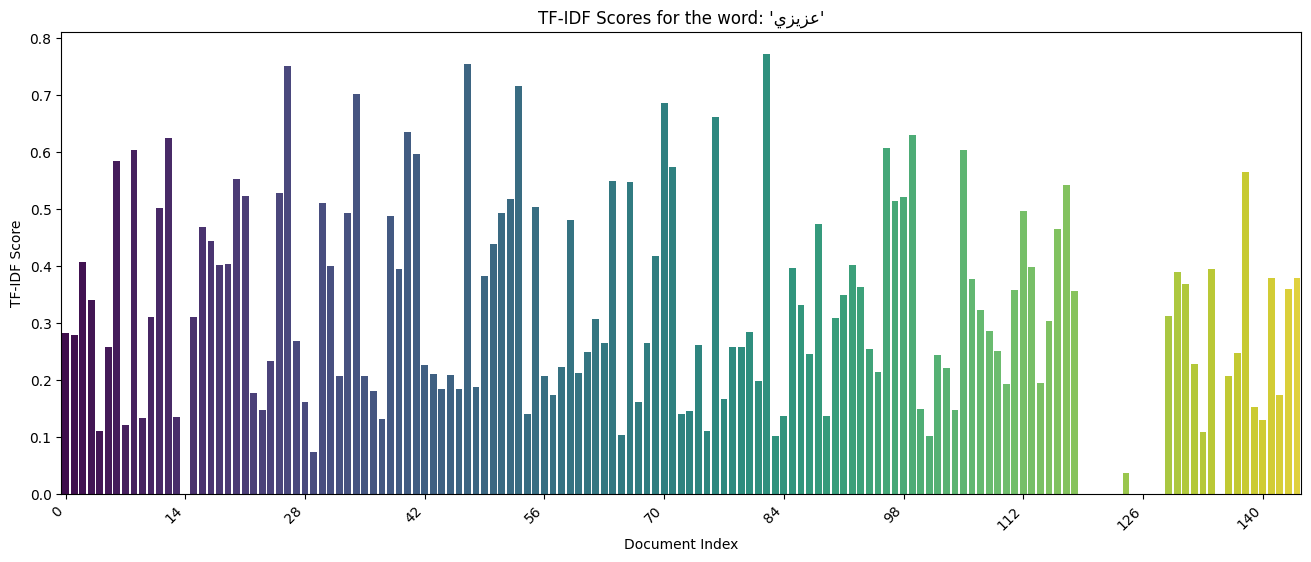

In [48]:
plot_tfidf_word(tfidf_result, "عزيزي")

<ipython-input-47-5c74468bc6bb>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=word_counts.index, y=word_counts.values, palette="viridis")


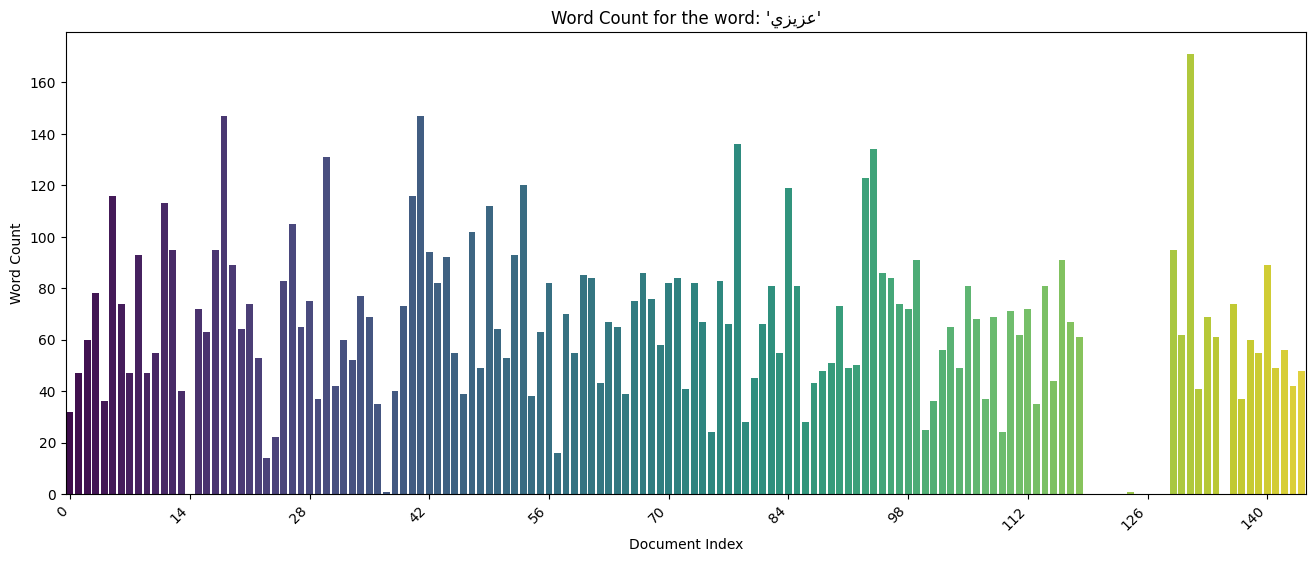

In [49]:
plot_count_word(abscount_result, "عزيزي")

## Checking the correlation between views and comments

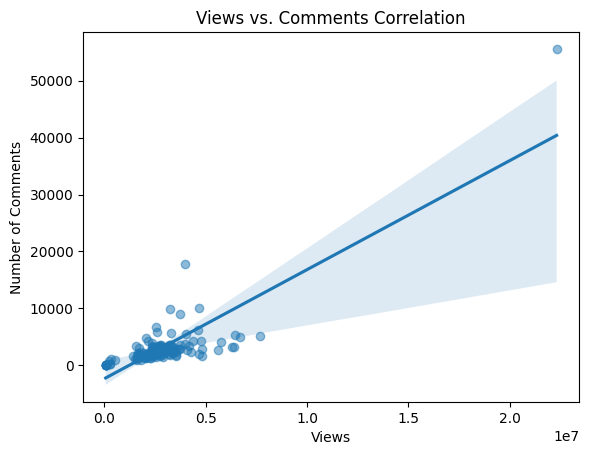

In [50]:
sns.regplot(data=df, x="views", y="comments", scatter_kws={"alpha":0.5})
plt.xlabel("Views")
plt.ylabel("Number of Comments")
plt.title("Views vs. Comments Correlation")
plt.show()

## Checking the correlation between likes and comments

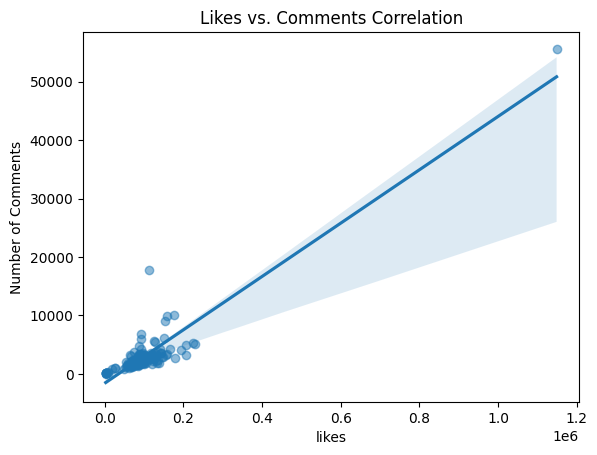

In [51]:
sns.regplot(data=df, x="likes", y="comments", scatter_kws={"alpha":0.5})
plt.xlabel("likes")
plt.ylabel("Number of Comments")
plt.title("Likes vs. Comments Correlation")
plt.show()

## Checking the correlation between likes and views

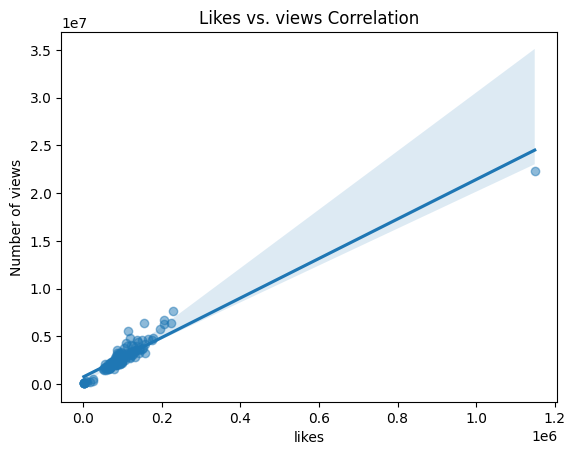

In [52]:
sns.regplot(data=df, x="likes", y="views", scatter_kws={"alpha":0.5})
plt.xlabel("likes")
plt.ylabel("Number of views")
plt.title("Likes vs. views Correlation")
plt.show()

***## END OF SUBMISSION***

Was exploring whether there is a strong correlation between the most frequently occurring words and the number of likes on a video. However, since most words in any given episode are generic words rather than meaningful terms, they do not provide significant insights. Additionally, the correlation with likes is likely influenced by the overall topic of the episode and the full script rather than the presence of a single word.

In [53]:
nltk.download("stopwords")
nltk.download("punkt")

# Load Arabic stopwords from NLTK
arabic_stopwords = set(stopwords.words("arabic"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [54]:
result_df = df.copy()  # Create a copy of the original DataFrame

In [55]:
def remove_stopwords_from_df(df):
    arabic_stops = set(stopwords.words('arabic'))
    # Add additional Egyptian Arabic stopwords that might not be in NLTK
    additional_stops = set([
        'مش', 'يعني', 'انت', 'ولكن', 'بقي', 'بس', 'زي', 'دي', 'عشان',
        'علي', 'يا', 'ولا', 'فيه', 'كدا', 'قبل', 'دا', 'اللي', 'ايه',
        'حاجه','لو','اي','ممكن','كمان','ايه','دي','كدا','دا','جدا','غير','انه','لما','هنا','سنه','حميد','ابو','عزيزي','انا', 'احنا', 'كل', 'بعض'
    ])

    # Combine the standard and additional stopwords
    all_stopwords = arabic_stops.union(additional_stops)

    # Function to process a single text
    def remove_stops(text):
        if pd.isna(text):
            return text

        # Tokenize Arabic text
        words = re.findall(r'[\u0600-\u06FF\u0750-\u077F\u08A0-\u08FF\u0590-\u05FF\w]+', text)

        # Filter out stopwords
        filtered_words = [word for word in words if word not in all_stopwords]

        # Join the words back into a string
        return " ".join(filtered_words)

    # Apply the function to the 'content' column
    result_df['content'] = result_df['content'].apply(remove_stops)

    return result_df

In [56]:
# Remove stopwords and get a new DataFrame
result_df = remove_stopwords_from_df(result_df)
result_df

,filename,content,likes,dislikes,views,comments,categories
0,Chat GPT,عمي بسيوني الايام راجل طيب افتكرت عم بسيوني سا...,158194,0,4196934,3417,"[chat gpt, how to use chat gpt, chat gpt expla..."
1,Oppenheimer,طبعا جون مستغرب خاظفينك ليه والله كتر خيركم هي...,206192,0,6313109,3213,"[مشروع مانهاتن, مشروع مانهاتن النووي, manhatta..."
2,آخر يوم في العالم,انتم عارفين جماعه بقالنا 13 يوم محبوسين الغواص...,156239,0,6396147,3185,"[الدحيح, برنامج الدحيح الجديد, eldahih, elda7e..."
3,أحلى برجر في العالم,ايوه ماما واحشاني الكل والله الغربه صعبه بقولك...,98494,0,2322834,2258,"[الدحيح, برنامج الدحيح الجديد, #daheeh #الدحيح..."
4,أحمد عدوية,فين فندم شايفني بدور لقينا مارادونا فندم اخيرا...,54754,0,1696731,1961,"[الدحيح, برنامج الدحيح الجديد, حلقة الدحيح, بر..."
...,...,...,...,...,...,...,...
140,هانيبال,اوه ماركينوس اعد استطيع النوم فرط قلقي روما وم...,151086,0,4607701,6220,"[هانيبال, hannibal, ancient rome, history of r..."
141,هل يمكن أن تصل درجة الحرارة في الرياض وبغداد إ...,ياه بحر تعبان اوي بحر تعبان تعبان قلبي مكسور و...,107315,0,3083126,2776,"[الدحيح, eldahih, elda7ee7, da7ee7, al daheeh,..."
142,يوم في حياة رائـد فضاء,جماعه كنا خلصنا القصه بقالنا 12 سيشن المشكله ت...,78215,0,2431407,1532,"[الدحيح, eldahih, elda7ee7, da7ee7, al daheeh,..."
143,يوم قيامة النجم,كلنا بتشوف الشمس يوم محدش يعرف اصل الشمس هعمل ...,90608,0,2644684,3432,"[الدحيح, نيو ميديا أكاديمي, da7e7, new media a..."


In [57]:
def analyze_word_frequency_and_correlation(df, top_n=20):

    view_column = None
    for col in df.columns:
        if col.lower() in ['views', 'view_count', 'viewcount', 'view']:
            view_column = col
            break


    # Step 1: Extract all words from content
    all_words = []
    for text in df['content'].dropna():
        # Use regex to extract Arabic words
        words = re.findall(r'[\u0600-\u06FF\u0750-\u077F\u08A0-\u08FF\u0590-\u05FF\w]+', text)
        all_words.extend(words)

    # Step 2: Count word frequencies
    word_counts = Counter(all_words)
    top_words = dict(word_counts.most_common(top_n))

    # Step 3: Create binary features for each top word
    correlation_data = []

    for word, count in top_words.items():
        # Create a binary column indicating if the content contains this word
        df[f'has_{word}'] = df['content'].apply(
            lambda x: 1 if pd.notna(x) and word in re.findall(r'[\u0600-\u06FF\u0750-\u077F\u08A0-\u08FF\u0590-\u05FF\w]+', x) else 0
        )

        # Calculate correlation with views
        corr, p_value = pearsonr(df[f'has_{word}'], df[view_column])

        # Add to results
        correlation_data.append({
            'word': word,
            'frequency': count,
            'correlation': corr,
            'p_value': p_value,
            'significant': p_value < 0.05
        })

        # Clean up temporary column
        df.drop(f'has_{word}', axis=1, inplace=True)

    # Create a DataFrame with correlation results
    corr_df = pd.DataFrame(correlation_data)
    corr_df = corr_df.sort_values('correlation', ascending=False)

    # Visualize results
    plt.figure(figsize=(12, 10))

    # Plot word frequency
    plt.subplot(2, 1, 1)
    plt.bar(top_words.keys(), top_words.values())
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Top {top_n} Most Frequent Words')
    plt.tight_layout()

    # Plot correlation with views
    plt.subplot(2, 1, 2)
    colors = ['g' if sig else 'r' for sig in corr_df['significant']]
    plt.bar(corr_df['word'], corr_df['correlation'], color=colors)
    plt.xticks(rotation=45, ha='right')
    plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    plt.title('Correlation Between Word Presence and Views')
    plt.tight_layout()

    plt.savefig('word_analysis.png')
    plt.close()

    return top_words, corr_df

In [58]:
word_freq, correlation = analyze_word_frequency_and_correlation(result_df)
print(correlation.sort_values('correlation', ascending=False))

      word  frequency  correlation   p_value  significant
5      لحد        803     0.326173  0.000062         True
2      لان        886     0.324328  0.000069         True
15   كانوا        652     0.307907  0.000165         True
12     دول        690     0.281778  0.000596         True
16   الوقت        636     0.271205  0.000968         True
10     اول        702     0.264608  0.001299         True
1   العالم       1036     0.263840  0.001343         True
9     كتير        704     0.255027  0.001963         True
7     انها        737     0.252581  0.002177         True
0    الناس       1114     0.245709  0.002893         True
14   خليني        667     0.222973  0.007023         True
19     حتي        615     0.202050  0.014804         True
3     الله        836     0.198302  0.016802         True
13    يبقي        670     0.198208  0.016856         True
11      حد        694     0.190187  0.021947         True
8     عايز        709     0.169915  0.041030         True
17   واحده    